Note: through this exam you should only make use of numpy, matplotlib and pandas.

#Q1

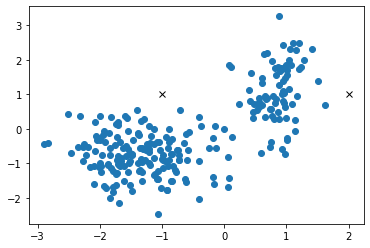

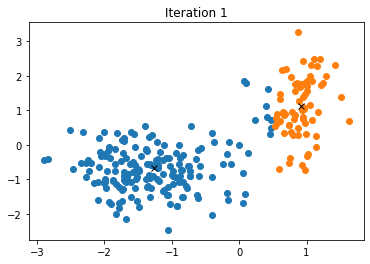

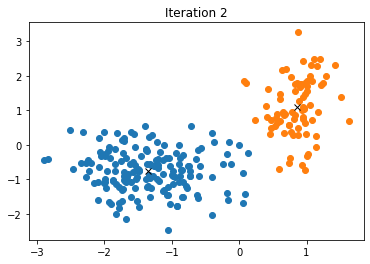

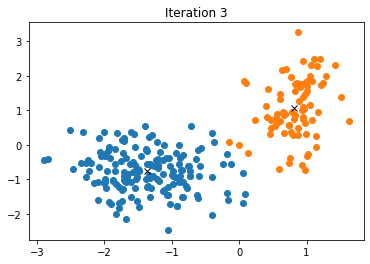

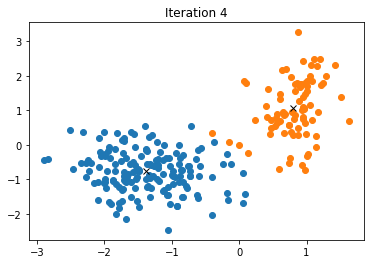

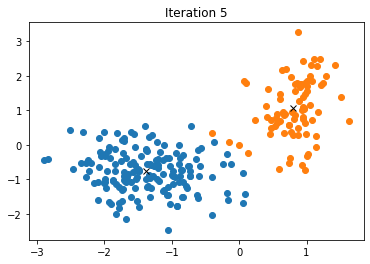

Final mean:
[-1.3791510103387137, -0.7713126942116482]
[0.8059622306566931, 1.055474947005938]


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']

#Continue here...
mean1 = [-1, 1]
mean2 = [2, 1]
plt.scatter(x1, x2)
plt.plot(mean1[0], mean1[1], 'kx')
plt.plot(mean2[0], mean2[1], 'kx')
plt.show()

class_info = np.ndarray(len(x1))
for i in range(5):
  L2_1 = (x1-mean1[0])**2 + (x2-mean1[1])**2
  L2_2 = (x1-mean2[0])**2 + (x2-mean2[1])**2
  class_info[L2_1 >= L2_2] = 2  # if closer to mean_2
  class_info[L2_1 < L2_2] = 1  # if closer to mean_1
  # reassign the means
  mean1 = [np.mean(x1[class_info==1]), np.mean(x2[class_info==1])]
  mean2 = [np.mean(x1[class_info==2]), np.mean(x2[class_info==2])]
  plt.scatter(x1[class_info==1], x2[class_info==1])
  plt.scatter(x1[class_info==2], x2[class_info==2])
  plt.plot(mean1[0], mean1[1], 'kx')
  plt.plot(mean2[0], mean2[1], 'kx')
  plt.title('Iteration %i'%(i+1))
  plt.show()
print('Final mean:')
print(mean1)
print(mean2)


#Q2

=> Class 1:
mean:
 [-1.34920307 -0.75202036]
cov:
 [[ 0.36348015 -0.03082807]
 [-0.03082807  0.35494227]]
=> Class 2:
mean:
 [0.85157853 1.10581811]
cov:
 [[0.07902776 0.03898851]
 [0.03898851 0.67727456]]
cov:
 [[0.07902776 0.03898851]
 [0.03898851 0.67727456]]


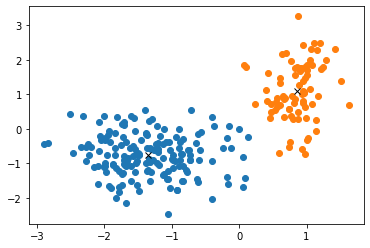

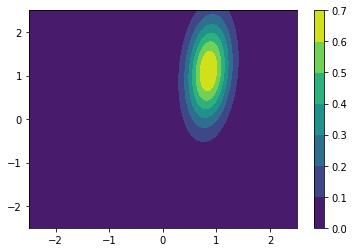

In [66]:
#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

df = pd.read_csv("http://pogo.software/me4ml/rjteh/d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#Continue 2(a) and 2(b) here...
c1_x1 = x1[clTrue==1]
c1_x2 = x2[clTrue==1]
c2_x1 = x1[clTrue==2]
c2_x2 = x2[clTrue==2]

def compute_mu_and_cov(x1, x2):
  x1 = np.array(x1)
  x2 = np.array(x2)
  mu = np.array([np.mean(x1), np.mean(x2)])
  X = np.array([x1, x2]).T
  # cov = (X-mu).T * (X-mu) / m
  cov = np.matmul((X-mu).T, (X-mu)) / len(x1)
  return mu, cov


mu_c1, cov_c1 = compute_mu_and_cov(x1[clTrue==1], x2[clTrue==1])
mu_c2, cov_c2 = compute_mu_and_cov(x1[clTrue==2], x2[clTrue==2])
print('=> Class 1:')
print('mean:\n', mu_c1)
print('cov:\n', cov_c1)
print('=> Class 2:')
print('mean:\n', mu_c2)
print('cov:\n', cov_c2)

# 2(b)
print('cov:\n', cov_c2)
Xgrid, x1line, x2line = gen_sample_grid(200, 200, 2.5)
# probability of being class 2
p_class2 = prob_density_2d(Xgrid, mu_c2[0], mu_c2[1], cov_c2)

plt.scatter(x1[clTrue==1], x2[clTrue==1])
plt.scatter(x1[clTrue==2], x2[clTrue==2])
plt.plot(mu_c1[0], mu_c1[1], 'kx')
plt.plot(mu_c2[0], mu_c2[1], 'kx')
plt.show()

plt.contourf(x1line, x2line, p_class2.reshape(200, 200))
plt.colorbar()
plt.show()


**Correct Solution:**

=> Class 1:
mean:
 [-1.34920307 -0.75202036]
cov:
 [[0.36348015 0.        ]
 [0.         0.35494227]]
=> Class 2:
mean:
 [0.85157853 1.10581811]
cov:
 [[0.07902776 0.        ]
 [0.         0.67727456]]
cov:
 [[0.07902776 0.        ]
 [0.         0.67727456]]


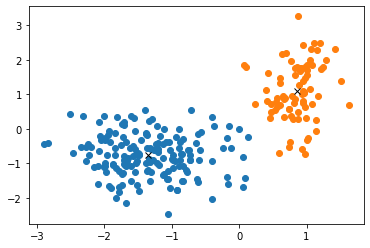

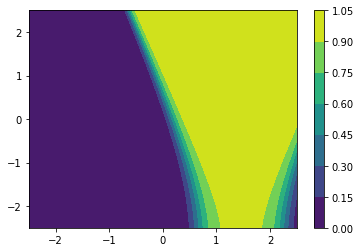

In [68]:
#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

df = pd.read_csv("http://pogo.software/me4ml/rjteh/d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#Continue 2(a) and 2(b) here...
c1_x1 = x1[clTrue==1]
c1_x2 = x2[clTrue==1]
c2_x1 = x1[clTrue==2]
c2_x2 = x2[clTrue==2]

def compute_mu_and_cov(x1, x2):
  x1 = np.array(x1)
  x2 = np.array(x2)
  mu = np.array([np.mean(x1), np.mean(x2)])
  # two parameters have no dependecy
  cov = np.array([[np.std(x1)**2, 0], [0, np.std(x2)**2]])
  return mu, cov


mu_c1, cov_c1 = compute_mu_and_cov(x1[clTrue==1], x2[clTrue==1])
mu_c2, cov_c2 = compute_mu_and_cov(x1[clTrue==2], x2[clTrue==2])
print('=> Class 1:')
print('mean:\n', mu_c1)
print('cov:\n', cov_c1)
print('=> Class 2:')
print('mean:\n', mu_c2)
print('cov:\n', cov_c2)

# 2(b)
print('cov:\n', cov_c2)
Xgrid, x1line, x2line = gen_sample_grid(200, 200, 2.5)
# likelihood
p_xw1 = prob_density_2d(Xgrid, mu_c1[0], mu_c1[1], cov_c1)  # p(x|omega1)
p_xw2 = prob_density_2d(Xgrid, mu_c2[0], mu_c2[1], cov_c2)  # p(x|omega2)

p_w1 = len(x1[clTrue==1]) / len(x1)
p_w2 = len(x1[clTrue==2]) / len(x1)
evidence = p_w1*p_xw1 + p_w2*p_xw2

# posterior
p_w2x = (p_xw2 * p_w2) / evidence  # p(omega2|x)

plt.scatter(x1[clTrue==1], x2[clTrue==1])
plt.scatter(x1[clTrue==2], x2[clTrue==2])
plt.plot(mu_c1[0], mu_c1[1], 'kx')
plt.plot(mu_c2[0], mu_c2[1], 'kx')
plt.show()

plt.contourf(x1line, x2line, p_w2x.reshape(200, 200))
plt.colorbar()
plt.show()


#Q2 (c)

Answer here...

For class 1, the first principle component is parallel to the x-axis and the second is parallel to the y-axis.

For class 2, the first principle component is parallel to the y-axis and the second is parallel to the x-axis.

This is because the trend of class 1 is horizontal and the trend if class 2 is vertical. There are 2 parameters (x&y) so two principle components, which are orthogonal to each other.

**Correct Solution:**

The principal components will be aligned with each axis, i.e. horizontal and vertical. This is because there is no covariance between the two datasets, so the principal directions of variation must be aligned with the two parameters.

#Q2 (d)

Answer here...

No. Because (-2, 2) are very far away from the training dataset, as seen from the scatterplot. The model is trained without the knowledge of region close to (-2, 2). Supervised machine learning (eg. clustering) is bad at extrapolation.

**Correct Solution:**

No - the result will not be reliable. This point is well away from the training data given, so effectively the normal distribution will be extrapolating into an area of very low probability.

#Q3

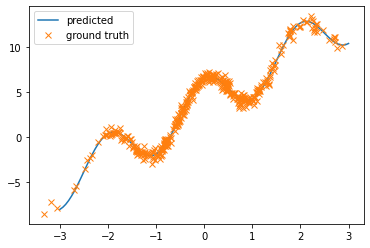

In [63]:
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d3.csv")
x = df['x']
y = df['y']

#Continue here...
# denote x1 = x, x2 = cos(pi*x)
x1 = x
x2 = np.cos(np.pi * x)
matrixA = np.array([[np.sum(x1**2), np.sum(x1*x2), np.sum(x1)],
           [np.sum(x1*x2), np.sum(x2**2), np.sum(x2)],
           [np.sum(x1), np.sum(x2), len(x1)]])
matrixb = np.array([np.sum(x1*y), np.sum(x2*y), np.sum(y)])
# Ax = b where b is the matrix to solve
[A, B, C] = np.matmul(np.linalg.inv(matrixA), matrixb)
xi = np.linspace(-3, 3, 100)
y_pred = A*xi + B*np.cos(np.pi*xi) + C
plt.plot(xi, y_pred, label='predicted')
plt.plot(x, y, 'x', label='ground truth')
plt.legend()
plt.show()

#Q4 (a)

In [ ]:
#Continue here... 
#or write out as a text field if you wish.

(0, 0) and (0.4, 1) are located in the left margin. The left margin is parallel to the separation line. So it has a vector of (0.4, 1) - (0, 0) = (0.4, 1). Therefore m = 1/0.4 = 2.5.

The midpoint between (0, 0) and (1, 0) is (0.5, 0). This is located in the separation line. Therefore 0 = 0.5 * 2.5 + c, which gives c = -1.25


#Q4 (b)

Answer here...

Impossible unless it is moved to (1, 0) so that it overlaps the vector in the second class. In this case the margin will be zero and the separation line will pass through (1, 0) and (0.4, 1).

**Correct Solution:**

Would have to move point (0,0) directly beneath the point at (0.4, 1) to turn into a 2 support vector problem, i.e. to (0.4, 0).